# Chapter 5: Support Vector Machines

## Linear SVM Classification

Classifies by splitting groups by the largest possible linear separation

Soft margin classification allows some outliers to be misclassified when identifying the best separation

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
x = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(np.float64)

/Users/mike/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss = "hinge"))
])

svm_clf.fit(x,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [5]:
svm_clf.predict([[5.5,1.7]])

array([1.])

## Nonlinear SVM Classification

Add polynomial featues to the SVM to create a nonlinear classifier

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C = 10, loss = "hinge"))
])

polynomial_svm_clf.fit(x,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

### Polynomial Kernel



In [119]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

def plot_svm_curve(degree = 3):
    moons = make_moons()
    x = moons[0]
    y = moons[1]
    poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel = "poly", degree = degree, coef0=1, C = 5))
    ])

    poly_kernel_svm_clf.fit(x,y)

    grid_density = 100
    #x_scale = StandardScaler().fit_transform(x)
    x1lim = (0, max(x[:,0]))
    x1steps = np.linspace(x1lim[0], x1lim[1], num = grid_density)
    x2lim = (0, max(x[:,1]))
    x2steps = np.linspace(x2lim[0], x2lim[1], num = grid_density)

    dat = np.zeros((grid_density, grid_density))
    for i, ix in enumerate(x1steps):
        for j, jx, in enumerate(x2steps):
            dat[i,j] = poly_kernel_svm_clf.predict([[ix,jx]])[0]
    imgplt = plt.imshow(dat)
    plt.scatter(x[:,0], x[:,1], c = y)


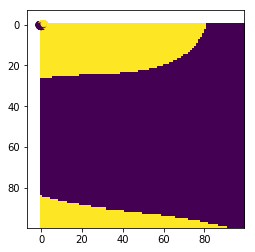

In [120]:
plot_svm_curve()

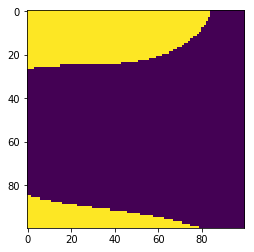

In [112]:
plot_svm_curve(degree = 5)

In [ ]:
import pandas as pd
import seaborn as sns
## Reimplement plot_svm_curve using pandas data structures
def plot_svm_curve_pd(degree = 3):
    moons = make_moons()
    x = moons[0]
    y = moons[1]
    poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel = "poly", degree = degree, coef0=1, C = 5))
    ])

    poly_kernel_svm_clf.fit(x,y)
    
    
        
    grid_density = 100
    #x_scale = StandardScaler().fit_transform(x)
    x1lim = (0, max(x[:,0]))
    x1steps = np.linspace(x1lim[0], x1lim[1], num = grid_density)
    x2lim = (0, max(x[:,1]))
    x2steps = np.linspace(x2lim[0], x2lim[1], num = grid_density)
    
    
    
    dat = pd.DataFrame({
        'x' : x1steps,
        'y' : x2steps
    })
    dat = np.zeros((grid_density, grid_density))
    for i, ix in enumerate(x1steps):
        for j, jx, in enumerate(x2steps):
            dat[i,j] = poly_kernel_svm_clf.predict([[ix,jx]])[0]
    imgplt = plt.imshow(dat)
    plt.scatter(x[:,0], x[:,1], c = y)

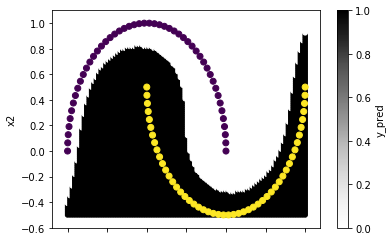

In [163]:
import itertools

degree = 3
moons = make_moons()
x = moons[0]
y = moons[1]
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = degree, coef0=1, C = 5))
])

poly_kernel_svm_clf.fit(x,y)



grid_density = 100
#x_scale = StandardScaler().fit_transform(x)
x1lim = (min(x[:,0]), max(x[:,0]))
x1steps = np.linspace(x1lim[0], x1lim[1], num = grid_density)
x2lim = (min(x[:,1]), max(x[:,1]))
x2steps = np.linspace(x2lim[0], x2lim[1], num = grid_density)

steps = np.array(list(itertools.product(x1steps, x2steps)))
dat = pd.DataFrame(steps, columns = ["x1", "x2"])

func = lambda x: poly_kernel_svm_clf.predict([x])[0]
dat["y_pred"] = dat.apply(func, axis = 1)
dat.plot.scatter(x = "x1", y = "x2", c = "y_pred")
plt.scatter(x[:,0], x[:,1], c = y)